# 1. Import and Install Dependencies

In [1]:
!pip install tensorflow==2.15.0 

  Obtaining dependency information for tensorflow-intel==2.15.0 from https://files.pythonhosted.org/packages/4c/48/1a5a15517f18eaa4ff8d598b1c000300b20c1bb0e624539d702117a0c369/tensorflow_intel-2.15.0-cp311-cp311-win_amd64.whl.metadata
  Using cached tensorflow_intel-2.15.0-cp311-cp311-win_amd64.whl.metadata (5.1 kB)
  Obtaining dependency information for tensorboard<2.16,>=2.15 from https://files.pythonhosted.org/packages/37/12/f6e9b9dcc310263cbd3948274e286538bd6800fd0c268850788f14a0c6d0/tensorboard-2.15.2-py3-none-any.whl.metadata
  Using cached tensorboard-2.15.2-py3-none-any.whl.metadata (1.7 kB)
  Obtaining dependency information for keras<2.16,>=2.15.0 from https://files.pythonhosted.org/packages/fc/a7/0d4490de967a67f68a538cc9cdb259bff971c4b5787f7765dc7c8f118f71/keras-2.15.0-py3-none-any.whl.metadata
  Using cached keras-2.15.0-py3-none-any.whl.metadata (2.4 kB)
Using cached tensorflow_intel-2.15.0-cp311-cp311-win_amd64.whl (300.9 MB)
Using cached keras-2.15.0-py3-none-any.whl (1.

ERROR: Could not install packages due to an OSError: [WinError 5] Access is denied: 'C:\\Users\\dell\\anaconda3\\Lib\\site-packages\\~-nsorflow\\compiler\\mlir\\quantization\\tensorflow\\calibrator\\pywrap_calibration.pyd'
Consider using the `--user` option or check the permissions.



In [2]:
!pip install tensorflow-gpu==2.12.0

  Using cached tensorflow-gpu-2.12.0.tar.gz (2.6 kB)
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'error'


  error: subprocess-exited-with-error
  
  python setup.py egg_info did not run successfully.
  exit code: 1
  
  [44 lines of output]
  Traceback (most recent call last):
    File "C:\Users\dell\anaconda3\Lib\site-packages\setuptools\_vendor\packaging\requirements.py", line 35, in __init__
      parsed = _parse_requirement(requirement_string)
               ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
    File "C:\Users\dell\anaconda3\Lib\site-packages\setuptools\_vendor\packaging\_parser.py", line 64, in parse_requirement
      return _parse_requirement(Tokenizer(source, rules=DEFAULT_RULES))
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
    File "C:\Users\dell\anaconda3\Lib\site-packages\setuptools\_vendor\packaging\_parser.py", line 82, in _parse_requirement
      url, specifier, marker = _parse_requirement_details(tokenizer)
                               ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
    File "C:\Users\dell\anaconda3\Lib\site-packages\setuptools\_vendo

In [3]:
!pip install opencv-python

In [4]:
!pip install mediapipe

In [5]:
!pip install scikit-learn

In [1]:
import cv2
import numpy as np
import os
from matplotlib import pyplot as plt
import time
import mediapipe as mp

# 2. Keypoints using MP Holistic

In [2]:
mp_holistic = mp.solutions.holistic # Holistic model
mp_drawing = mp.solutions.drawing_utils # Drawing utilities

In [3]:
def mediapipe_detection(image, model):
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB) # COLOR CONVERSION BGR 2 RGB
    image.flags.writeable = False                  # Image is no longer writeable
    results = model.process(image)                 # Make prediction
    image.flags.writeable = True                   # Image is now writeable 
    image = cv2.cvtColor(image, cv2.COLOR_RGB2BGR) # COLOR COVERSION RGB 2 BGR
    return image, results

In [4]:
def draw_landmarks(image, results):
    mp_drawing.draw_landmarks(image, results.face_landmarks, mp_holistic.FACEMESH_TESSELATION) # Draw face connections
    mp_drawing.draw_landmarks(image, results.pose_landmarks, mp_holistic.POSE_CONNECTIONS) # Draw pose connections
    mp_drawing.draw_landmarks(image, results.left_hand_landmarks, mp_holistic.HAND_CONNECTIONS) # Draw left hand connections
    mp_drawing.draw_landmarks(image, results.right_hand_landmarks, mp_holistic.HAND_CONNECTIONS) # Draw right hand connections


In [5]:
def draw_styled_landmarks(image, results):
    # Draw face connections
    mp_drawing.draw_landmarks(image, results.face_landmarks, mp_holistic.FACEMESH_TESSELATION,
                               landmark_drawing_spec=mp_drawing.DrawingSpec(color=(80,110,10), thickness=1, circle_radius=1),
                               connection_drawing_spec=mp_drawing.DrawingSpec(color=(80,256,121), thickness=1, circle_radius=1)
                               )
    # Draw pose connections
    mp_drawing.draw_landmarks(image, results.pose_landmarks, mp_holistic.POSE_CONNECTIONS,
                               landmark_drawing_spec=mp_drawing.DrawingSpec(color=(80,22,10), thickness=2, circle_radius=4),
                               connection_drawing_spec=mp_drawing.DrawingSpec(color=(80,44,121), thickness=2, circle_radius=2)
                               )
    # Draw left hand connections
    mp_drawing.draw_landmarks(image, results.left_hand_landmarks, mp_holistic.HAND_CONNECTIONS,
                               landmark_drawing_spec=mp_drawing.DrawingSpec(color=(80,110,10), thickness=1, circle_radius=1),
                               connection_drawing_spec=mp_drawing.DrawingSpec(color=(80,256,121), thickness=1, circle_radius=1)
                               )
    # Draw right hand connections
    mp_drawing.draw_landmarks(image, results.right_hand_landmarks, mp_holistic.HAND_CONNECTIONS,
                               landmark_drawing_spec=mp_drawing.DrawingSpec(color=(80,110,10), thickness=1, circle_radius=1),
                               connection_drawing_spec=mp_drawing.DrawingSpec(color=(80,256,121), thickness=1, circle_radius=1)
                               )


In [6]:
cap = cv2.VideoCapture(0)
# Set mediapipe model 
with mp_holistic.Holistic(min_detection_confidence=0.5, min_tracking_confidence=0.5) as holistic:
    while cap.isOpened():

        # Read feed
        ret, frame = cap.read()

        # Make detections
        image, results = mediapipe_detection(frame, holistic)
        print(results)
        
        # Draw landmarks
        draw_styled_landmarks(image, results)

        # Show to screen
        cv2.imshow('OpenCV Feed', image)

        # Break gracefully
        if cv2.waitKey(10) & 0xFF == ord('q'):
            break
    cap.release()
    cv2.destroyAllWindows()
    
    

<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>


In [7]:
results.face_landmarks

landmark {
  x: 0.6900274
  y: 0.70948696
  z: -0.032292135
}
landmark {
  x: 0.69195926
  y: 0.65535605
  z: -0.06680221
}
landmark {
  x: 0.6899054
  y: 0.6699056
  z: -0.03383939
}
landmark {
  x: 0.6774738
  y: 0.5869009
  z: -0.052715175
}
landmark {
  x: 0.6917819
  y: 0.63557154
  z: -0.0716385
}
landmark {
  x: 0.69053257
  y: 0.6075872
  z: -0.06738961
}
landmark {
  x: 0.6864084
  y: 0.5368372
  z: -0.034899924
}
landmark {
  x: 0.5862418
  y: 0.53114957
  z: 0.00757359
}
landmark {
  x: 0.68395853
  y: 0.47657165
  z: -0.026803188
}
landmark {
  x: 0.68329996
  y: 0.44776052
  z: -0.030259667
}
landmark {
  x: 0.6799935
  y: 0.3554481
  z: -0.021121792
}
landmark {
  x: 0.68997455
  y: 0.71834743
  z: -0.030004418
}
landmark {
  x: 0.6896494
  y: 0.72498
  z: -0.025428217
}
landmark {
  x: 0.6892741
  y: 0.72721386
  z: -0.019714106
}
landmark {
  x: 0.68926024
  y: 0.7279426
  z: -0.017881632
}
landmark {
  x: 0.6894863
  y: 0.7354642
  z: -0.01972441
}
landmark {
  x: 0.68

In [8]:
# Length of right hand landmarks
right_hand_landmarks_length = len(results.right_hand_landmarks.landmark) if results.right_hand_landmarks else 0

# Length of left hand landmarks
left_hand_landmarks_length = len(results.left_hand_landmarks.landmark) if results.left_hand_landmarks else 0

# Length of face landmarks
face_landmarks_length = len(results.face_landmarks.landmark) if results.face_landmarks else 0

# Length of pose landmarks
pose_landmarks_length = len(results.pose_landmarks.landmark) if results.pose_landmarks else 0

print("Number of right hand landmarks:", right_hand_landmarks_length)
print("Number of left hand landmarks:", left_hand_landmarks_length)
print("Number of face landmarks:", face_landmarks_length)
print("Number of pose landmarks:", pose_landmarks_length)


Number of right hand landmarks: 21
Number of left hand landmarks: 0
Number of face landmarks: 468
Number of pose landmarks: 33


In [9]:
results

mediapipe.python.solution_base.SolutionOutputs

In [10]:
draw_landmarks(frame, results)

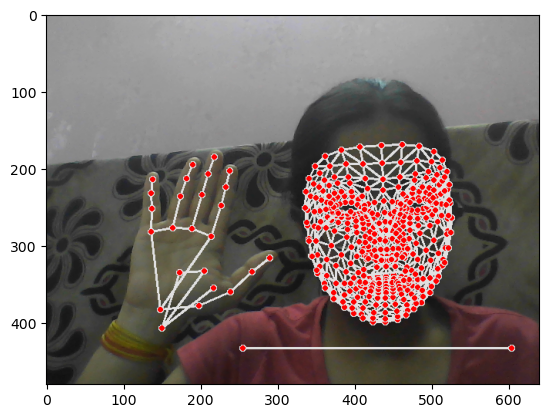

In [11]:
plt.imshow(cv2.cvtColor(frame, cv2.COLOR_BGR2RGB))

# 3. Extract Keypoint Values

In [12]:
pose = []
for res in results.pose_landmarks.landmark:
    test = np.array([res.x, res.y, res.z, res.visibility])
    pose.append(test)
test

array([5.67599475e-01, 3.25692987e+00, 7.73673415e-01, 3.69420974e-04])

In [13]:
pose = np.array([[res.x, res.y, res.z, res.visibility] for res in results.pose_landmarks.landmark]).flatten() if results.pose_landmarks else np.zeros(132)
face = np.array([[res.x, res.y, res.z] for res in results.face_landmarks.landmark]).flatten() if results.face_landmarks else np.zeros(1404)
lh = np.array([[res.x, res.y, res.z] for res in results.left_hand_landmarks.landmark]).flatten() if results.left_hand_landmarks else np.zeros(21*3)
rh = np.array([[res.x, res.y, res.z] for res in results.right_hand_landmarks.landmark]).flatten() if results.right_hand_landmarks else np.zeros(21*3)

In [14]:
pose,face,lh,rh

(array([ 6.88605905e-01,  6.14217699e-01, -2.97480607e+00,  9.99907196e-01,
         7.19297409e-01,  5.14443636e-01, -2.91042781e+00,  9.99848247e-01,
         7.38357425e-01,  5.09584069e-01, -2.91016674e+00,  9.99828756e-01,
         7.56600022e-01,  5.05819142e-01, -2.91044402e+00,  9.99734998e-01,
         6.46036267e-01,  5.28419375e-01, -2.91576648e+00,  9.99845564e-01,
         6.17502153e-01,  5.33359468e-01, -2.91641974e+00,  9.99846458e-01,
         5.93650818e-01,  5.38647890e-01, -2.91673017e+00,  9.99828577e-01,
         7.89708495e-01,  5.30437410e-01, -2.26731801e+00,  9.99815702e-01,
         5.52270770e-01,  5.77410936e-01, -2.27103496e+00,  9.99921322e-01,
         7.29314089e-01,  6.93805635e-01, -2.71043849e+00,  9.99843240e-01,
         6.44106328e-01,  7.06659555e-01, -2.71491671e+00,  9.99878347e-01,
         9.44680870e-01,  9.03662443e-01, -1.71880758e+00,  9.93770897e-01,
         3.98589611e-01,  9.02273715e-01, -1.70141757e+00,  9.96455789e-01,
         1.1

In [15]:
face = np.array([[res.x, res.y, res.z] for res in results.face_landmarks.landmark]).flatten() \
    if results.face_landmarks else np.zeros(1404)
face

array([ 0.69002742,  0.70948696, -0.03229214, ...,  0.78476518,
        0.49601871,  0.02014029])

In [16]:
def extract_keypoints(results):
    pose = np.array([[res.x, res.y, res.z, res.visibility] for res in results.pose_landmarks.landmark]).flatten() if results.pose_landmarks else np.zeros(33*4)
    face = np.array([[res.x, res.y, res.z] for res in results.face_landmarks.landmark]).flatten() if results.face_landmarks else np.zeros(468*3)
    lh = np.array([[res.x, res.y, res.z] for res in results.left_hand_landmarks.landmark]).flatten() if results.left_hand_landmarks else np.zeros(21*3)
    rh = np.array([[res.x, res.y, res.z] for res in results.right_hand_landmarks.landmark]).flatten() if results.right_hand_landmarks else np.zeros(21*3)
    return np.concatenate([pose, face, lh, rh])

In [17]:
result_test = extract_keypoints(results)

In [18]:
result_test

array([ 0.6886059 ,  0.6142177 , -2.97480607, ...,  0.21597707,
        0.44684052, -0.01681274])

In [19]:
468*3+33*4+21*3+21*3

1662

In [20]:
np.save('0', result_test)

In [21]:
np.load('0.npy')

array([ 0.6886059 ,  0.6142177 , -2.97480607, ...,  0.21597707,
        0.44684052, -0.01681274])

# 4. Setup Folders for Collection

In [22]:
# Path for exported data, numpy arrays
DATA_PATH = os.path.join('MP_Data10') 

# Actions that we try to detect
actions = np.array(['hello', 'thanks', 'iloveyou','yes','no','please','I/Me','Father','Mother','Help','What','Eat','Go','Need','Busy'])

# 5 videos worth of data
no_sequences = 5

# Videos are going to be 5 frames in length
sequence_length = 5

In [23]:
# hello
## 0
## 1
## 2
## ...
## 29
# thanks

# I love you

In [24]:
for action in actions: 
    for sequence in range(no_sequences):
        try: 
            os.makedirs(os.path.join(DATA_PATH, action, str(sequence)))
        except:
            pass

# 5. Collect Keypoint Values for Training and Testing

In [52]:
cap = cv2.VideoCapture(0)
# Set mediapipe model 
with mp_holistic.Holistic(min_detection_confidence=0.5, min_tracking_confidence=0.5) as holistic:
    
    # NEW LOOP
    # Loop through actions
    for action in actions:
        # Loop through sequences aka videos
        for sequence in range(no_sequences):
            # Loop through video length aka sequence length
            for frame_num in range(sequence_length):

                # Read feed
                ret, frame = cap.read()

                # Make detections
                image, results = mediapipe_detection(frame, holistic)
#                 print(results)

                # Draw landmarks
                draw_styled_landmarks(image, results)
                
                # NEW Apply wait logic
                if frame_num == 0: 
                    cv2.putText(image, 'STARTING COLLECTION', (120,200), 
                               cv2.FONT_HERSHEY_SIMPLEX, 1, (0,255, 0), 4, cv2.LINE_AA)
                    cv2.putText(image, 'Collecting frames for {} Video Number {}'.format(action, sequence), (15,12), 
                               cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 0, 255), 1, cv2.LINE_AA)
                    # Show to screen
                    cv2.imshow('OpenCV Feed', image)
                    cv2.waitKey(2000)
                else: 
                    cv2.putText(image, 'Collecting frames for {} Video Number {}'.format(action, sequence), (15,12), 
                               cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 0, 255), 1, cv2.LINE_AA)
                    # Show to screen
                    cv2.imshow('OpenCV Feed', image)
                
                # NEW Export keypoints
                keypoints = extract_keypoints(results)
                npy_path = os.path.join(DATA_PATH, action, str(sequence), str(frame_num))
                np.save(npy_path, keypoints)

                # Break gracefully
                if cv2.waitKey(10) & 0xFF == ord('q'):
                    break
                    
    cap.release()
    cv2.destroyAllWindows()

In [ ]:
cap.release()
cv2.destroyAllWindows()

# 6. Preprocess Data and Create Labels and Features

In [25]:
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical

In [26]:
label_map = {label:num for num, label in enumerate(actions)}

In [27]:
label_map

{'hello': 0,
 'thanks': 1,
 'iloveyou': 2,
 'yes': 3,
 'no': 4,
 'please': 5,
 'I/Me': 6,
 'Father': 7,
 'Mother': 8,
 'Help': 9,
 'What': 10,
 'Eat': 11,
 'Go': 12,
 'Need': 13,
 'Busy': 14}

In [28]:
sequences, labels = [], []
for action in actions:
    for sequence in range(no_sequences):
        window = []
        for frame_num in range(sequence_length):
            res = np.load(os.path.join(DATA_PATH, action, str(sequence), "{}.npy".format(frame_num)))
            window.append(res)
        sequences.append(window)
        labels.append(label_map[action])

In [29]:
labels

[0,
 0,
 0,
 0,
 0,
 1,
 1,
 1,
 1,
 1,
 2,
 2,
 2,
 2,
 2,
 3,
 3,
 3,
 3,
 3,
 4,
 4,
 4,
 4,
 4,
 5,
 5,
 5,
 5,
 5,
 6,
 6,
 6,
 6,
 6,
 7,
 7,
 7,
 7,
 7,
 8,
 8,
 8,
 8,
 8,
 9,
 9,
 9,
 9,
 9,
 10,
 10,
 10,
 10,
 10,
 11,
 11,
 11,
 11,
 11,
 12,
 12,
 12,
 12,
 12,
 13,
 13,
 13,
 13,
 13,
 14,
 14,
 14,
 14,
 14]

In [30]:
sequences

[[array([ 0.61561483,  0.64075816, -1.01955807, ...,  0.1290291 ,
          0.63651121, -0.0532126 ]),
  array([ 0.66491443,  0.38061187, -1.66897845, ...,  0.09235692,
          0.2074737 , -0.06919949]),
  array([ 0.66896093,  0.41099051, -1.65774083, ...,  0.10456061,
          0.29667449, -0.06348577]),
  array([ 0.6797241 ,  0.38459143, -1.60790181, ...,  0.12033053,
          0.23539045, -0.06240638]),
  array([ 0.67673731,  0.38382328, -1.77412796, ...,  0.12602291,
          0.24114256, -0.0618373 ])],
 [array([ 0.67503256,  0.41082653, -1.53842592, ...,  0.12824956,
          0.27133954, -0.06189071]),
  array([ 0.67184436,  0.42271799, -1.71343517, ...,  0.11819026,
          0.36113575, -0.07405935]),
  array([ 0.66989905,  0.42900604, -1.68371224, ...,  0.11871222,
          0.3622663 , -0.068932  ]),
  array([ 0.66804302,  0.43738195, -1.65932941, ...,  0.11444716,
          0.35700151, -0.06227805]),
  array([ 0.66675484,  0.44154236, -1.76150453, ...,  0.11606906,
      

In [31]:
np.array(sequences).shape

(75, 5, 1662)

In [32]:
np.array(labels).shape

(75,)

In [33]:
X = np.array(sequences)

In [34]:
X.shape

(75, 5, 1662)

In [35]:
y = to_categorical(labels).astype(int)

In [36]:
y

array([[1, 0, 0, ..., 0, 0, 0],
       [1, 0, 0, ..., 0, 0, 0],
       [1, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 1],
       [0, 0, 0, ..., 0, 0, 1],
       [0, 0, 0, ..., 0, 0, 1]])

In [37]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [38]:
y_test.shape

(15, 15)

In [39]:
X.shape

(75, 5, 1662)

# 7. Build and Train LSTM Neural Network

In [40]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
from tensorflow.keras.callbacks import TensorBoard

In [41]:
log_dir = os.path.join('Logs')
tb_callback = TensorBoard(log_dir=log_dir)

In [42]:
import tensorflow.compat.v1 as tf
tf.disable_v2_behavior()
tf.compat.v1.disable_resource_variables()

model = Sequential()
model.add(LSTM(64, return_sequences=True, activation='relu', input_shape=(5,1662)))
model.add(LSTM(128, return_sequences=True, activation='relu'))
model.add(LSTM(64, return_sequences=False, activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(actions.shape[0], activation='softmax'))



Instructions for updating:
non-resource variables are not supported in the long term



In [43]:
res = [.7, 0.2, 0.1]

In [44]:
actions[np.argmax(res)]

'hello'

In [45]:
model.compile(optimizer='Adam', loss='categorical_crossentropy', metrics=['categorical_accuracy'])

In [46]:
print(model.summary())

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 5, 64)             442112    
                                                                 
 lstm_1 (LSTM)               (None, 5, 128)            98816     
                                                                 
 lstm_2 (LSTM)               (None, 64)                49408     
                                                                 
 dense (Dense)               (None, 64)                4160      
                                                                 
 dense_1 (Dense)             (None, 32)                2080      
                                                                 
 dense_2 (Dense)             (None, 15)                495       
                                                                 
Total params: 597071 (2.28 MB)
Trainable params: 597071 

In [47]:
model.fit(X_train, y_train, epochs=500)



Train on 60 samples
Epoch 1/500
60/60 [==============================] - 2s 30ms/sample - loss: 2.7079 - categorical_accuracy: 0.0833
Epoch 2/500
60/60 [==============================] - 0s 1ms/sample - loss: 2.7234 - categorical_accuracy: 0.0833
Epoch 3/500
60/60 [==============================] - 0s 1ms/sample - loss: 2.6906 - categorical_accuracy: 0.1167
Epoch 4/500
60/60 [==============================] - 0s 1ms/sample - loss: 2.6640 - categorical_accuracy: 0.1500
Epoch 5/500
60/60 [==============================] - 0s 1ms/sample - loss: 2.6300 - categorical_accuracy: 0.1333
Epoch 6/500
60/60 [==============================] - 0s 1ms/sample - loss: 2.5640 - categorical_accuracy: 0.1500
Epoch 7/500
60/60 [==============================] - 0s 1ms/sample - loss: 2.4789 - categorical_accuracy: 0.1500
Epoch 8/500
60/60 [==============================] - 0s 880us/sample - loss: 2.4333 - categorical_accuracy: 0.1500
Epoch 9/500
60/60 [==============================] - 0s 1ms/sample - lo

In [48]:
import keras
import tensorflow as tf

print("Keras version:", keras.__version__)
print("TensorFlow version:", tf.__version__)


Keras version: 2.15.0
TensorFlow version: 2.15.0


# 8. Make Predictions

In [49]:
res = model.predict(X_test)

C:\Users\dell\anaconda3\Lib\site-packages\keras\src\engine\training_v1.py:2359: UserWarning: `Model.state_updates` will be removed in a future version. This property should not be used in TensorFlow 2.0, as `updates` are applied automatically.
  updates=self.state_updates,


In [50]:
res

array([[1.14706256e-09, 3.26955529e-08, 1.00000000e+00, 5.61501423e-09,
        1.11317691e-11, 2.96427290e-15, 2.75025234e-29, 6.78779952e-38,
        8.40746438e-15, 3.24404561e-18, 1.34313167e-34, 5.53757533e-28,
        8.67068968e-19, 7.62440095e-29, 1.55405878e-27],
       [2.35765205e-22, 8.74834157e-17, 1.17142775e-07, 9.99999881e-01,
        4.58830446e-10, 1.20667807e-20, 8.00461860e-27, 3.56555426e-24,
        1.93410412e-24, 3.66452091e-09, 1.73281403e-24, 7.72722747e-15,
        2.74702035e-23, 8.85487925e-24, 6.49578490e-25],
       [8.39549237e-19, 8.28397684e-10, 8.91399517e-14, 1.35671148e-14,
        8.38913798e-15, 2.38848552e-10, 9.99999881e-01, 9.48572384e-12,
        1.19886365e-10, 6.18587919e-08, 3.08992740e-14, 5.91130862e-22,
        4.75390525e-17, 3.50679661e-16, 7.39545062e-17],
       [1.42049912e-25, 3.64168845e-28, 1.10120697e-27, 1.10242888e-14,
        6.09639385e-15, 6.42375129e-12, 4.17296451e-31, 3.21649253e-07,
        1.29662152e-30, 5.15365928e-0

In [51]:
actions[np.argmax(res[3])]

'What'

In [52]:
actions[np.argmax(y_test[3])]

'What'

In [53]:
from sklearn.metrics import multilabel_confusion_matrix, accuracy_score

In [54]:
yhat = model.predict(X_test)

In [55]:
ytrue = np.argmax(y_test, axis=1).tolist()
yhat = np.argmax(yhat, axis=1).tolist()

In [56]:
multilabel_confusion_matrix(ytrue, yhat)

array([[[13,  0],
        [ 0,  2]],

       [[13,  0],
        [ 0,  2]],

       [[12,  1],
        [ 0,  2]],

       [[14,  0],
        [ 1,  0]],

       [[14,  1],
        [ 0,  0]],

       [[14,  0],
        [ 1,  0]],

       [[14,  0],
        [ 1,  0]],

       [[13,  0],
        [ 0,  2]],

       [[13,  0],
        [ 0,  2]],

       [[14,  0],
        [ 0,  1]],

       [[13,  2],
        [ 0,  0]],

       [[14,  0],
        [ 1,  0]]], dtype=int64)

In [57]:
accuracy_score(ytrue, yhat)

0.7333333333333333

# 11. Test in Real Time

In [70]:
import numpy as np
import cv2
import matplotlib.pyplot as plt

# Assuming you have your probabilities, actions, and image ready
# res = list of probabilities for each label
# actions = list of label names
# image = input image

# Define your colors for 15 labels
colors = [(245,117,16), (117,245,16), (16,117,245), (245,16,117), (117,16,245), (16,245,117),
          (245,117,117), (117,245,117), (117,117,245), (245,245,16), (245,16,245), (16,245,245),
          (117,117,117), (16,16,245), (245,16,16)]

def prob_viz(res, actions, input_frame, colors):
    output_frame = input_frame.copy()
    for num, prob in enumerate(res):
        cv2.rectangle(output_frame, (0,30+num*30), (int(prob*300), 60+num*30), colors[num], -1)  # Adjusted rectangle dimensions
        cv2.putText(output_frame, actions[num], (0, 55+num*30), cv2.FONT_HERSHEY_SIMPLEX, 0.5, (255,255,255), 1, cv2.LINE_AA)  # Adjusted position and font scale
        
    return output_frame



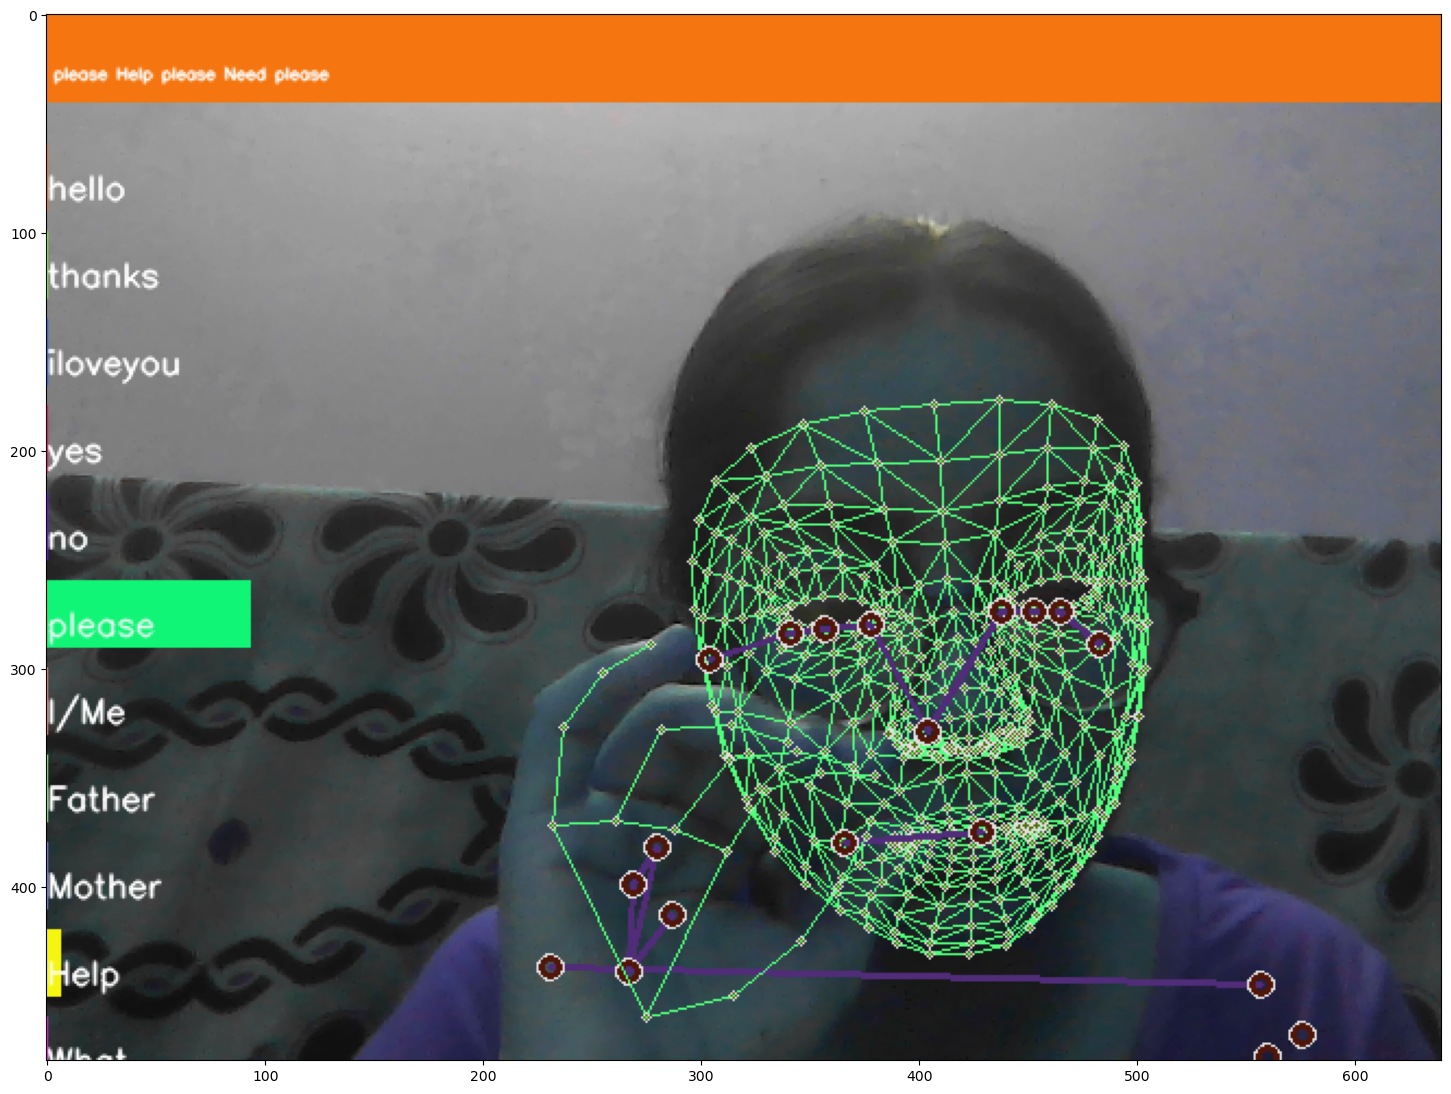

In [74]:
plt.figure(figsize=(18,18))
plt.imshow(prob_viz(res, actions, image, colors))
plt.show()

In [73]:
import cv2
import numpy as np

# Your existing code...

# New detection variables
sequence = []
sentence = []
threshold = 0.8

cap = cv2.VideoCapture(0)
# Set mediapipe model 
with mp_holistic.Holistic(min_detection_confidence=0.5, min_tracking_confidence=0.5) as holistic:
    while cap.isOpened():

        # Read feed
        ret, frame = cap.read()

        # Make detections
        image, results = mediapipe_detection(frame, holistic)
        print(results)
        
        # Draw landmarks
        draw_styled_landmarks(image, results)
        
        # Prediction logic
        keypoints = extract_keypoints(results)
        sequence.append(keypoints)
        sequence = sequence[-5:]
        
        if len(sequence) == 5:
            res = model.predict(np.expand_dims(sequence, axis=0))[0]
            print("Predictions:", {action: score for action, score in zip(actions, res)})
            print("Selected Action:", actions[np.argmax(res)])
            
            
        # Viz logic
            if res[np.argmax(res)] > threshold: 
                if len(sentence) > 0: 
                    if actions[np.argmax(res)] != sentence[-1]:
                        sentence.append(actions[np.argmax(res)])
                else:
                    sentence.append(actions[np.argmax(res)])

            if len(sentence) > 5: 
                sentence = sentence[-5:]

            # Viz probabilities
            image = prob_viz(res, actions, image, colors)
            
        cv2.rectangle(image, (0,0), (640, 40), (245, 117, 16), -1)
        cv2.putText(image, ' '.join(sentence), (3,30), 
                       cv2.FONT_HERSHEY_SIMPLEX, 0.25, (255, 255, 255), 1, cv2.LINE_AA)  # Adjusted font scale
        
        # Show to screen
        cv2.imshow('OpenCV Feed', image)

        # Break gracefully
        if cv2.waitKey(10) & 0xFF == ord('q'):
            break
    cap.release()
    cv2.destroyAllWindows()


<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Predictions: {'hello': 0.0, 'thanks': 0.0, 'iloveyou': 0.0, 'yes': 1.4971536e-20, 'no': 1.5131665e-21, 'please': 1.0346396e-24, 'I/Me': 0.0, 'Father': 0.003170021, 'Mother': 0.0, 'Help': 1.0790426e-12, 'What': 0.0025006295, 'Eat': 1.6223239e-12, 'Go': 2.7964565e-18, 'Need': 0.9874866, 'Busy': 0.006842696}
Selected Action: Need
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Predictions: {'hello': 0.0, 'thanks': 0.0, 'iloveyou': 0.0, 'yes': 7.5660345e-21, 'no': 8.599607e-22, 'please': 1.6931546e-24, 'I/Me': 0.0, 'Father': 0.00125092, 'Mother': 0.0, 'Help': 2.2217339e-12, 'What': 0.0010609495, 'Eat': 1.0149493e-12, 'Go': 3.955199e-18, 'Need': 0.98814034, 'Busy': 0.009547882}
Selected Action: Need
<c

In [62]:
actions

array(['hello', 'thanks', 'iloveyou', 'yes', 'no', 'please', 'I/Me',
       'Father', 'Mother', 'Help', 'What', 'Eat', 'Go', 'Need', 'Busy'],
      dtype='<U8')

In [64]:
cap.release()
cv2.destroyAllWindows()

In [65]:
res[np.argmax(res)] > threshold

True

In [66]:
#(num_sequences,30,1662)

In [67]:
model.predict(np.expand_dims(X_test[0], axis=0))

array([[9.9999416e-01, 8.9211613e-07, 3.3018232e-06, 9.5535502e-10,
        1.7152635e-06, 3.6943977e-12]], dtype=float32)

# GUI

In [61]:
import tkinter as tk
import cv2
import numpy as np
import mediapipe as mp

# Function to perform gesture recognition
def perform_recognition():
    sequence = []
    sentence = []
    predictions = []
    threshold = 0.5
    
    cap = cv2.VideoCapture(0)
    mp_holistic = mp.solutions.holistic

    with mp_holistic.Holistic(min_detection_confidence=0.5, min_tracking_confidence=0.5) as holistic:
        while cap.isOpened():
            ret, frame = cap.read()
            if not ret:
                break

            image = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)
            image.flags.writeable = False
            results = holistic.process(image)
            image.flags.writeable = True
            image = cv2.cvtColor(image, cv2.COLOR_RGB2BGR)

            keypoints = extract_keypoints(results)
            sequence.append(keypoints)
            sequence = sequence[-5:]

            if len(sequence) == 5:
                res = model.predict(np.expand_dims(sequence, axis=0))[0]
                predictions.append(np.argmax(res))

                if np.unique(predictions[-10:])[0] == np.argmax(res):
                    if res[np.argmax(res)] > threshold:
                        if len(sentence) > 0:
                            if actions[np.argmax(res)] != sentence[-1]:
                                sentence.append(actions[np.argmax(res)])
                        else:
                            sentence.append(actions[np.argmax(res)])

                if len(sentence) > 5:
                    sentence = sentence[-5:]

                # Show the recognized gesture on the GUI
                label_var.set(' '.join(sentence))

                # Viz probabilities
                image = prob_viz(res, actions, image, colors)

            cv2.imshow('OpenCV Feed', image)

            if cv2.waitKey(10) & 0xFF == ord('q'):
                break

        cap.release()
        cv2.destroyAllWindows()

# Create the main application window
root = tk.Tk()
root.title("Gesture Recognition System")

# Create a label to display the recognized gesture
label_var = tk.StringVar()
label_var.set("Recognized Gesture: ")
recognized_label = tk.Label(root, textvariable=label_var, font=("Arial", 14))
recognized_label.pack(pady=20)

# Create a button to start gesture recognition
start_button = tk.Button(root, text="Start Recognition", command=perform_recognition)
start_button.pack(pady=10)

# Run the main event loop
root.mainloop()
